## Novi asfalt

Piše se leto 2036. Asfalt na kolesarski poti, ki teče vzporedno z Večno potjo, dokončno razpade in *Mestna občina Ljubljana* (MOL) ugotovi, da je napočil čas za prenovo. *Oddelek za gozdarske dejavnosti in motorni promet* ugotovi, da so zadnje zaplate asfalta dejansko izginile in sklene, da bodo vsako leto asfaltirali tretjino poti. Kolesarji se razveselé, da bo pot asfaltirana že v treh letih, vendar se izkaže, da je to mišljeno malo drugače: vsako leto bodo asfaltirali tretjino **preostale dolžine poti**.

Recimo, da je celotna pot dolga 2700 metrov.

- Prvo leto bodo asfaltirali eno tretjino, to je 2700 / 3 = **900** metrov. Neasfaltiranih bo še 1800 metrov.
- Drugo leto bodo asfaltirali eno tretjino ostanka, torej 1800 / 3 = **600** metrov. Neasfaltiranih bo še 1200 metrov.
- Tretje leto bodo asfaltirali eno tretjino preostanka, torej 1200 / 3 = **400** metrov. Neasfaltiranih bo še 800 metrov.
- ...

Kolesarji - presneta banda nehvaležna! - seveda začnejo robantiti, da tega ne bo nikoli konec in opletati z limitami, [pa Ahilom, pa želvami](https://en.wikipedia.org/wiki/Infinity#Zeno:_Achilles_and_the_tortoise)... MOL jih v svoji neskončni potrpežljivosti pomiri, da bodo metre zaokrožali navzgor:

- ...
- Četrto leto bodo asfaltirali tretjino od 800, to je 267 metrov, ostalo bo še 533 metrov.
- Peto leto pride na vrsto 178 metrov, ostane še 355 metrov.
- Šesto leto dodajo 119 metrov, ostane 236 metrov.
- ...

Izkaže se, da se prenova ne bo vlekla v neskončnost, temveč bo končana v borih **19** letih, kar je, kot pripomni MOL, bistveno hitreje kot nikoli. Zlobno natolcevanje kolesarjev je s tem razkrinkano kot neresnično.

## Obvezna naloga

Napiši program, ki mu vpišemo dolžino poti in izpiše, koliko metrov bo asfaltiranih v posameznem letu, na koncu pa še, koliko let bo trajalo asfaltiranje.

**Program naj ne izpisuje ničesar drugega kot te številke.**

Če vnesemo 2700, program izpiše

```python
900
600
400
267
178
119
79
53
35
23
16
10
7
5
3
2
1
1
1
19
```

Če vnesemo 100, program izpiše

```python
34
22
15
10
7
4
3
2
1
1
1
11
```

Če vnesemo 10000, program izpiše

```python
3334
2222
1482
988
658
439
293
195
130
87
58
38
26
17
11
8
5
3
2
2
1
1
22
```

#### Rešitev

Rešitev je na prvi pogled preprosta.

V `novi_asfalt` izračunamo, koliko bo novega asfalta. To izpišemo in odštejemo od `dolzina`, ki pove, koliko asfalta še manjka.

Težava, na katero so MOL opozorili že kolesarji, je, da se to nikoli ne konča: če vsako leto asfaltirajo tretjino ostanka, bo vedno ostalo še nekaj neasfaltiranega. Samo po sebi to ni nič hudega, navsezadnje smo vajeni napol-makadamskih poti, problem pa bi utegnil biti, da bodo tam stalno kakšne table in zapore.

Kakorkoli, naloga pravi, da moramo rezultat deljenja zaokrožati navzgor. Kako to storiti? Načinov je veliko. Imejmo pot dolžine `10`: navzgor zaokrožen količnik je 4.

In [6]:
dolzina = 10

Kdor je pogooglal ali povprašal kje drugje, je najbrž naletel na funkcijo `ceil`, ki jo je potrebno pričarati z `from math import *`.

In [7]:
from math import ceil

ceil(dolzina / 3)

4

Lahko pa uporabimo celoštevilsko deljenje. To zaokroža navzdol in, kot bi si mislil naivec, bomo potem pač prišteli 1.

In [8]:
dolzina // 3 + 1

4

To seveda ne deluje, ko je `dolzina` deljiva s `3`.

In [10]:
dolzina = 12

In [11]:
dolzina // 3 + 1

5

Rešimo se lahko z dodatnim `if`-om.

In [14]:
dolzina = 12

novi_asfalt = dolzina // 3
if dolzina % 3 != 0:
    novi_asfalt += 1

In [13]:
novi_asfalt

4

In [15]:
dolzina = 10

novi_asfalt = dolzina // 3
if dolzina % 3 != 0:
    novi_asfalt += 1

In [16]:
novi_asfalt

4

(
Če si je kdo zapomnil, da je `True` isto kot `1`, lahko napiše tudi kar

In [17]:
novi_asfalt = dolzina // 3 + (dolzina % 3 != 0)

In [18]:
novi_asfalt

4

To bo h količniku prištelo `True` (torej 1), če število ni deljivo s `3` in `False` (0), če je.

"Klasična" rešitev tega problema pa je

In [19]:
(dolzina + 2) // 3

4

Če je `dolzina` deljiva s `3` in ji prištejemo `2`, bo rezultat ostal enak, kot je bil. Če ni bila deljiva s `3`, pa je bil ostanek po deljenju s `3` vsaj `1`. Ko k temu ostanku prištejemo `2`, je "ostanek" že vsaj `3`, torej se količnik poveča (za `1` - za več se ne more, saj bi moral biti ostanek za to prej enak `3`).

Popravimo torej program; in da se ne bomo hecali z `input`, kar fiksirajmo dolžino poti na 2700.

In [21]:
dolzina = 2700

leta = 0

while dolzina > 0:
    novi_asfalt = (dolzina + 2 ) // 3
    print(novi_asfalt)
    dolzina -= novi_asfalt
    leta += 1

print(leta)

900
600
400
267
178
119
79
53
35
23
16
10
7
5
3
2
1
1
1
19


## Dodatne naloge

### Rešitev z rekurzivno funkcijo

Če ni česa asfaltirati, bo to trajalo 0 let. Sicer pa bo asfaltiranje trajalo eno leto in še toliko časa, kolikor bo vzelo asfaltiranje ostanka.

In [22]:
def asfaltiranje(dolzina):
    if not dolzina:
        return 0
    novi = (dolzina + 2) // 3
    print(novi)
    return 1 + asfaltiranje(dolzina - novi)

Lahko pa tudi

In [23]:
def asfaltiranje(dolzina):
    novi = (dolzina + 2) // 3
    print(novi)
    return dolzina - novi and 1 + asfaltiranje(dolzina - novi)

Druga različica je zabavna, vendar deluje pravilno (zakaj, kako pravzaprav deluje?!) le, če predpostavimo, da bo vedno potrebno kaj asfaltirati. Klic `asfaltiranje(0)` namreč vrne 0 namesto 1.

### Graf števila let asfaltiranja glede na dolžino poti

Narišite graf, ki ima na osi x različne dolžine poti, na primer `[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]`, na `y` pa, koliko let bo trajalo asfaltiranje za takšno dolžino. Za gornje primere bi bil graf videti takole:

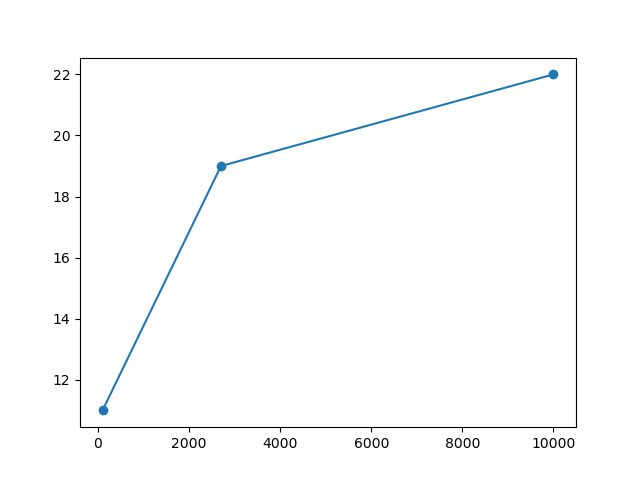

Ta graf je seveda malo "polomljen", ker je točk malo. Če bi jih narisali več, recimo dolžine, ki smo jih našteli zgoraj: je čas asfaltiranja sorazmeren dolžini? Z drugimi besedami, je graf približno premica (z manjšimi naključnimi odkloni, kot na gornjem grafu)? Ali pa ni? Če ni: na katero krivuljo vas spominja? Znate to dokazati - grafično, s primerno spremenjenim grafom? Znate morda utemeljiti, zakaj je tako?


#### Rešitev

Ne bomo se spuščali v to, kako se to spogramira: kdor zna, naj, kdor ne, se bo že še naučil. Bolj je zanimiva krivulja.

Za začetek rešimo nalogo s funkcijo. (Če koga zanima, kako to deluje, naj se le razgleda!)

In [2]:
from itertools import count

def asfalt(n):
    for leta in count():
        if n == 0:
            return leta
        n -= (n + 2) // 3

Namestili bomo knjižnico `matplotlib`. Z njo lahko v Jupytru naredimo tole:

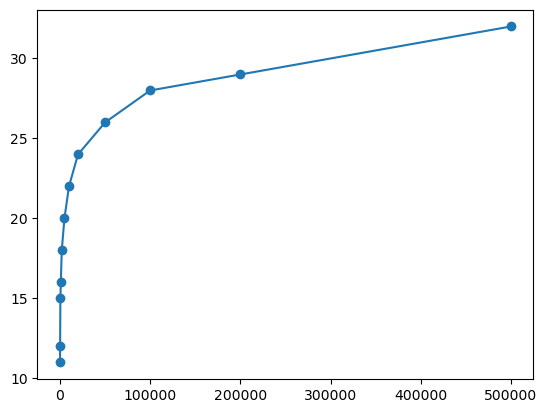

In [3]:
from matplotlib import pyplot as plt

dolzine = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]
leta = [asfalt(n) for n in dolzine]

plt.plot(dolzine, leta, marker="o")

Graf ni premica, funkcija ni linearna. Z dolžino poti čas asfaltiranja narašča ... nekako vedno počasneje.

V resnici je funkcija logaritemska. O tem se prepričamo tako, da spremenimo os x v logaritemsko.

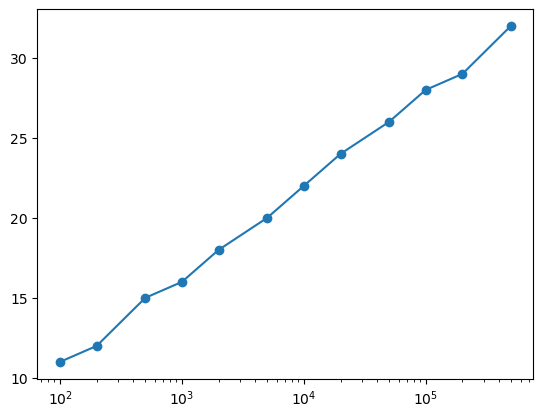

In [4]:
plt.plot(dolzine, leta, marker="o")
plt.xscale("log")

Ali, preprosteje, na graf poleg črte, ki kaže čas asfaltiranja, dodamo še primerno skalirano logaritemsko krivuljo.

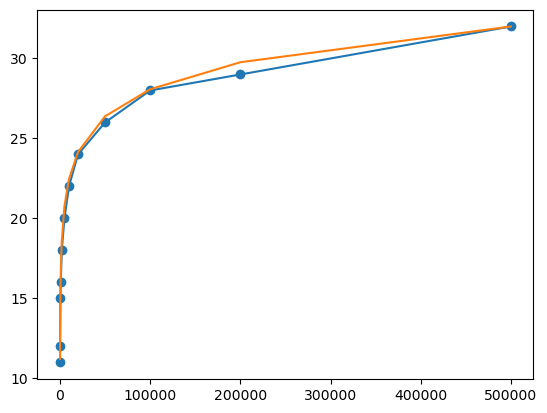

In [6]:
from math import *

f = leta[-1] / log(dolzine[-1])

plt.plot(dolzine, leta, marker="o")
plt.plot(dolzine, [f * log(dolzina) for dolzina in dolzine])

Vidimo, da se krivulji odlično prilegata. Čas asfaltiranja je torej sorazmeren logaritmu dolžine poti.

Faktor, s katerim smo morali raztegniti krivuljo, je

In [35]:
f

2.438585114561106

Znamo morda utemeljiti, zakaj je tako? Hja. Vzemimo dve poti: ena je dolga 1000 m, druga pa je 50 % daljša, torej 1500 m. Bodo 50 % daljšo pot asfaltirali 50 % dlje časa? Ne, asfaltirali jo bodo le eno leto dlje, saj bodo v prvem letu asfaltirali 500 m in ostalo jih bo 1000.

Kakšno zvezo ima to z logaritmom? Ima, berite dalje. (To, kar smo napisali v prejšnjem odstavku, dokazuje le, da zveza ni linearna.)

### Naloga za matematike

Znate morda s preprosto matematično formulo oceniti (z napako enega ali dveh let gor ali dol), koliko let bo trajala prenova?

#### Rešitev

Hm. Da bo lažje računati in razmišljati: recimo, da bi se MOL odločil vsako leto asfaltirati polovico poti in da je pot dolga 1024 metrov (da bo lažje deliti). Prvo leto asfaltirajo 512 m, drugo leto 256 m, tretje 128 m ... Vprašanje je potem, v bistvu, kolikokrat je potrebno 1024 deliti z 2, da dobimo 1 (oziroma 0, po tem, ko zadnje leto asfaltirajo še ta meter). Vprašanje "kolikokrat je potrebno 1024 deliti z 2, da dobimo 1" lahko obrnemo v "kolikokrat moramo pomnožiti 2 samo s seboj, da dobimo 1024". Se pravi, "dva na koliko je 1024". Ali, v splošnem, "dva na koliko je `dolzina`". Bolj matematično $2^x = d$: če poznamo $d$, koliko je $x$? Logaritem, seveda $x = \log_2 d$.

Če bi vsako leto asfaltirali 1 / 2 poti, 1 / 2 poti pa bi ostalo, bi bil odgovor, da bo asfaltiranje zahtevalo (dvojiški) logaritem dolžine poti. Ker vsako leto ostane 2 / 3 poti, pa je odgovor logaritem z osnovo 3 / 2. Asfaltiranje zahteva približno $\log_{3/2} dolzina$ let.

Preverimo.

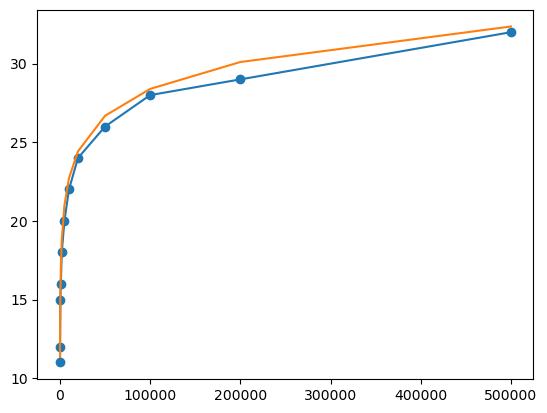

In [36]:
from math import *

plt.plot(dolzine, leta, marker="o")
plt.plot(dolzine, [log(dolzina, 3 / 2) for dolzina in dolzine])

V tem grafu rišemo $\log_{3 / 2} x$, v prejšnjem smo risali $f \log x$, kjer je bil `log` naravni logaritem.

Matematiki nas učijo, da je $\log_{b} x = \frac{\log x}{\log b}$. Torej je $\log_{3/2} x = \frac{\log x}{\log 3/2}$. Če naj bo to isto kot $f \log x$, potem je $f$ najbrž približno $1 / \log_{3 / 2}$. Je res?

In [37]:
f

2.438585114561106

In [38]:
1 / log(3 / 2)

2.4663034623764317

V resnici se krivulji ne prilegata povsem - zaradi zaokrožanja navzgor.

### Asfalt do zadnjega metra

MOL se odloči, da metrov ne bo zaokrožal navzgor. Vsako leto bo asfaltiral natančno eno tretjino ostanka. Z asfaltiranjem bo končal, ko bo neasfaltirana dolžina krajša od enega metra, kar je za kolesarje čisto dovolj dobro. Napiši program, ki računa čas asfaltiranja po takšnem pravilu. (Ne skrbite glede natančnosti: Pythonov `float` ima 15 decimalnih mest, premer protona pa je $10^{-15} m$. Še več: najmanjši pozitivni `float` je $5\times 10^{-324} m$, Planckova razdalja - v nekem smislu "najmanjša možna razdalja" v fiziki - pa je $10^{-35} m$. Pythonov `float` bo za reševanje te naloge čez in čez dovolj.)

#### Rešitev

In [41]:
dolzina = 2700

leta = 0
while dolzina > 1:
    dolzina *= 2 / 3
    leta += 1
    
print(leta)

20


### Rešitev s formulo

Če ste rešili prejšnjo nalogo: znate morda na ta problem odgovoriti s povsem preprosto matematično formulo? Obstaja matematična funkcija, ki računa natančno to reč, samo njen rezultat morate zaokrožiti navzgor.

#### Rešitev

Že vemo: navzgor zaokrožen logaritem z osnovo 3/2. Ker ni zaokrožanja, je rezultat točen, le navzgor ga je potrebno zaokrožiti: $\mbox{leta} = \lceil \log_{3/2} \mbox{dolzina} \rceil$.

In [9]:
ceil(log(2700, 3 / 2))

20

In [10]:
dolzina = 345823476

leta = 0
while dolzina > 1:
    dolzina *= 2 / 3
    leta += 1
    
print(leta)

49


In [165]:
ceil(log(345823476, 3 / 2))

49